In [5]:
# standard library packages
import getpass
import json
import os
import pathlib
import subprocess
from glob import glob
from io import BytesIO
from shapely.geometry import Point

# other necessary packages
import earthpy.appeears as eaapp
import folium
import geopandas as gpd
import hvplot.pandas
import hvplot.xarray
import pandas as pd
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import requests
import rioxarray as rxr
import xarray as xr

In [6]:
weather_data = os.path.join(pathlib.Path.home(), 'Grizzly_Creek_Weather_data')

In [21]:
# link for max temperature data for garfield county, CO
data_url = ('https://www.ncei.noaa.gov/orders/cdo/3742439.csv')

In [22]:
# read csv link and convert to df
gwd_sprgs_2_df = pd.read_csv(data_url, header = 11, 
    names = ['STATION', 'NAME',	'DATE',	'DAPR',	'MDPR',	'PRCP', 'SNOW',
    'SNWD', 'TMAX', 'TMIN', 'TOBS'],
    na_values= ['NaN']
    )
gwd_sprgs_2_df

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2018-01-12,NaN,NaN,0.0,0.0,0.0,34.0,22.0,28.0
1,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2018-01-13,NaN,NaN,0.0,0.0,0.0,43.0,24.0,24.0
2,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2018-01-14,NaN,NaN,0.0,0.0,0.0,41.0,23.0,23.0
3,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2018-01-15,NaN,NaN,0.0,0.0,0.0,44.0,22.0,22.0
4,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2018-01-16,NaN,NaN,0.0,0.0,0.0,40.0,17.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
1533,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2022-05-27,NaN,NaN,0.0,0.0,0.0,85.0,46.0,60.0
1534,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2022-05-28,NaN,NaN,0.0,0.0,0.0,88.0,48.0,58.0
1535,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2022-05-29,NaN,NaN,0.0,0.0,0.0,79.0,46.0,56.0
1536,USC00053359,"GLENWOOD SPGS NUMBER 2, CO US",2022-05-30,NaN,NaN,0.0,0.0,0.0,63.0,38.0,43.0


<Axes: title={'center': 'Maximum Daily Temperature for Glenwood Springs, CO 2020'}, xlabel='Time', ylabel='Temperature ($^\\circ$C)'>

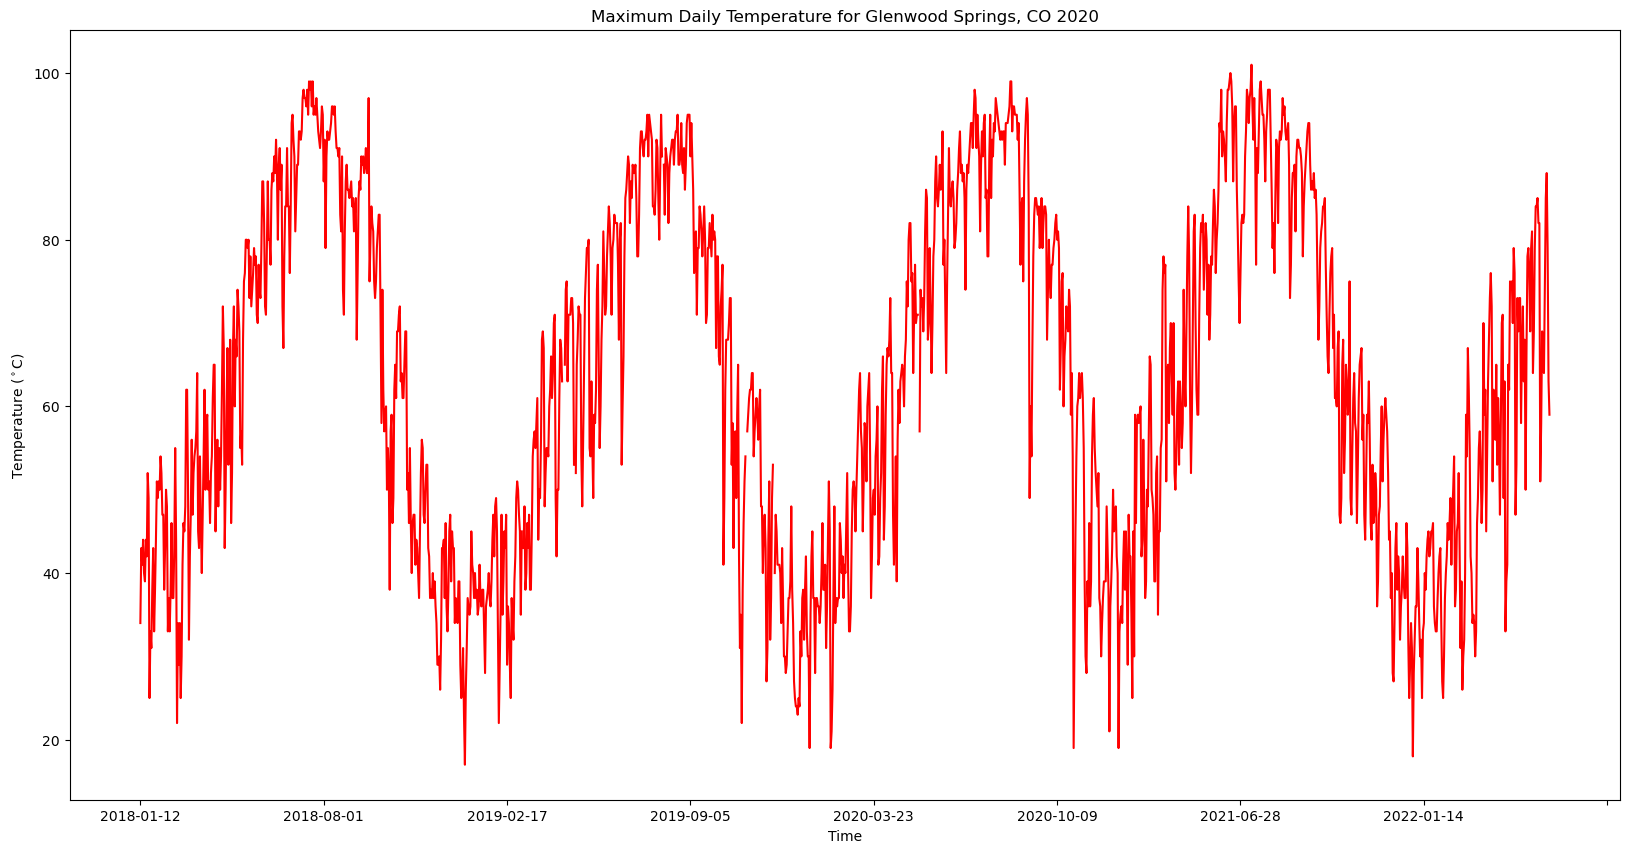

In [23]:
#set figure size
plt.figure(figsize=(20, 10))  
#plot max temp data
gwd_sprgs_2_df.plot(x='DATE', 
                    y='TMAX', 
                    legend=False, 
                    xlabel='Time', 
                    ylabel= 'Temperature ($^\circ$C)', 
                    title= 'Maximum Daily Temperature for Glenwood Springs, CO 2020',
                    color= 'red', 
                    ax=plt.gca()  # Use the current Axes object
)

<Axes: title={'center': 'Daily Precipitation for Garfield County, CO 2020'}, xlabel='Month', ylabel='Precipitation (in/day)'>

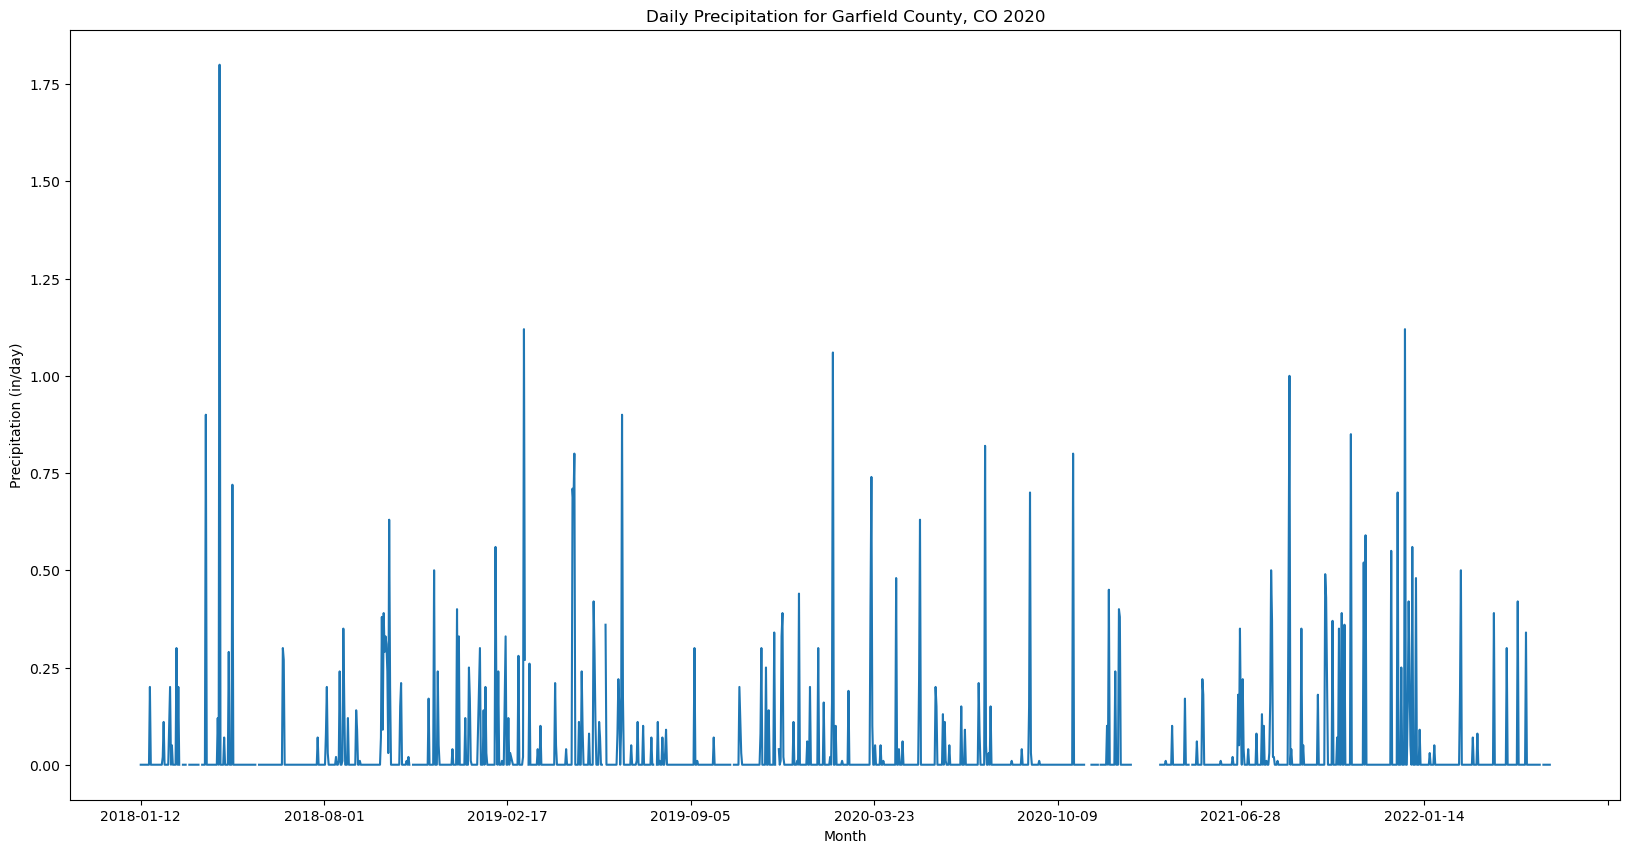

In [24]:
#set figure size
plt.figure(figsize=(20, 10))

#plot precip data
gwd_sprgs_2_df.plot(x='DATE', y='PRCP', legend=False, xlabel='Month', 
                    ylabel= 'Precipitation (in/day)', 
                    title= 'Daily Precipitation for Garfield County, CO 2020',
                    ax=plt.gca()  # Use the current Axes object
                    )